In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import os

In [2]:
# 데이터 불러오기
dfs = []
for year in range(2021, 2025):
    for month in range(1, 13):
        file = f'./data/고등어csv/{year}/{year}-{month}.csv'
        if os.path.exists(file):
            df = pd.read_csv(file, encoding='utf-8')
            df['year'] = year
            df['month'] = month
            dfs.append(df)

data_all = pd.concat(dfs, ignore_index=True)

In [3]:
# datetime 형식
data_all['date'] = pd.to_datetime(
    dict(year=data_all['year'], month=data_all['month'], day=1)
)

In [4]:
# '평균가'와 '낙찰고가' 컬럼의 문자 → 정수 변환 (콤마 제거)
data_all['평균가'] = data_all['평균가'].astype(str).str.replace(',', '').astype(float)
data_all['낙찰고가'] = data_all['낙찰고가'].astype(str).str.replace(',', '').astype(float)
data_all['낙찰저가'] = data_all['낙찰저가'].astype(str).str.replace(',', '').astype(float)

In [5]:
data_all

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date
0,(선)고등어,부산(기장),30미,S/P,142,15.0,36000.0,31000.0,33500.0,2021,1,2021-01-01
1,(선)고등어,목포,30미,S/P,4,10.0,30000.0,30000.0,30000.0,2021,1,2021-01-01
2,(선)고등어,제주도,10미,S/P,59,15.0,60000.0,25000.0,34700.0,2021,1,2021-01-01
3,(선)고등어,부산(기장),22미,S/P,168,15.0,52000.0,47000.0,48900.0,2021,1,2021-01-01
4,(선)고등어,목포,20미,S/P,32,10.0,30000.0,30000.0,30000.0,2021,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2047,(냉)염고등어,노르웨이,중,CT/(BT),271,6.0,40800.0,38200.0,39300.0,2024,12,2024-12-01
2048,(냉)염고등어,노르웨이,8손,CT/(BT),255,7.0,42700.0,42700.0,42700.0,2024,12,2024-12-01
2049,(냉)염고등어,기타(국내),대,CT/(BT),10,13.0,47000.0,47000.0,47000.0,2024,12,2024-12-01
2050,(냉)염고등어,노르웨이,150/200,CT/(BT),20,12.0,104900.0,104900.0,104900.0,2024,12,2024-12-01


In [6]:
cols = ['date', 'year', 'month'] + [col for col in data_all.columns if col not in ['date', 'year', 'month']]

In [8]:
# 컬럼 순서 재배치
data_all = data_all[cols]

data_all.head(2)

,date,year,month,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가
0,2021-01-01,2021,1,(선)고등어,부산(기장),30미,S/P,142,15.0,36000.0,31000.0,33500.0
1,2021-01-01,2021,1,(선)고등어,목포,30미,S/P,4,10.0,30000.0,30000.0,30000.0


In [10]:
#  산지 별로 오름차순 정렬
data_all = data_all.sort_values(by=['date', '산지'])
data_all = data_all.reset_index(drop=True)
data_all

,date,year,month,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가
0,2021-01-01,2021,1,(냉)고등어,기타(국내),20미,CT/(BT),20,10.0,50000.0,45000.0,49800.0
1,2021-01-01,2021,1,(냉)고등어,기타(국내),30미,CT/(BT),50,10.0,32000.0,32000.0,32000.0
2,2021-01-01,2021,1,(냉)염고등어,기타(국내),소,CT/(BT),30,9.0,26500.0,26500.0,26500.0
3,2021-01-01,2021,1,(냉)고등어,노르웨이,400/600,CT/(BT),833,20.0,77000.0,54100.0,55900.0
4,2021-01-01,2021,1,(냉)고등어,노르웨이,300/500,CT/(BT),260,20.0,63700.0,58500.0,59700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2024-12-01,2024,12,(냉)고등어,제주도,24미,S/P,1,12.0,20000.0,20000.0,20000.0
2048,2024-12-01,2024,12,(냉)고등어,제주도,25미,S/P,1,12.0,20000.0,20000.0,20000.0
2049,2024-12-01,2024,12,(냉)고등어,제주도,16미,S/P,1,12.0,20000.0,20000.0,20000.0
2050,2024-12-01,2024,12,(냉)고등어,제주도,19미,S/P,1,12.0,20000.0,20000.0,20000.0


In [17]:
# year 컬럼 별로 '연도별 고등어의 경매 평균가'
year_avg = data_all.groupby('year')['평균가'].mean()
year_avg

year
2021    32514.285714
2022    34348.944338
2023    37605.188679
2024    36370.370370
Name: 평균가, dtype: float64

C:\Users\406\anaconda3\envs\yh\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\406\anaconda3\envs\yh\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\406\anaconda3\envs\yh\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\406\anaconda3\envs\yh\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\406\anaconda3\envs\yh\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu San

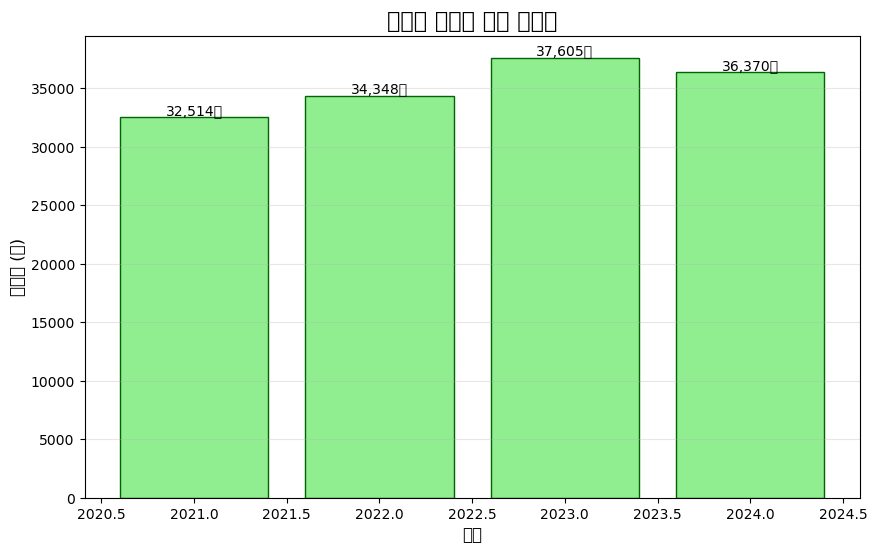

<Figure size 800x500 with 0 Axes>

In [18]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(year_avg.index, year_avg.values, color='lightgreen', edgecolor='darkgreen')

# 막대 위에 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}원',
             ha='center', va='bottom', fontsize=10)

plt.title('연도별 고등어 평균 경매가', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균가 (원)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.show()

In [19]:
##  월별 고등어의 경매 평균가
month_average = data_all.groupby('month')['평균가'].mean()
month_average

month
1     39382.191781
2     44124.571429
3     42557.954545
4     37660.248447
5     36001.369863
6     29200.000000
7     27853.554502
8     31721.546961
9     27904.458599
10    37249.350649
11    35167.788462
12    36682.758621
Name: 평균가, dtype: float64

C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\406\AppData\Local\Temp\ipykernel_10664\2034863007.py:17: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from fon

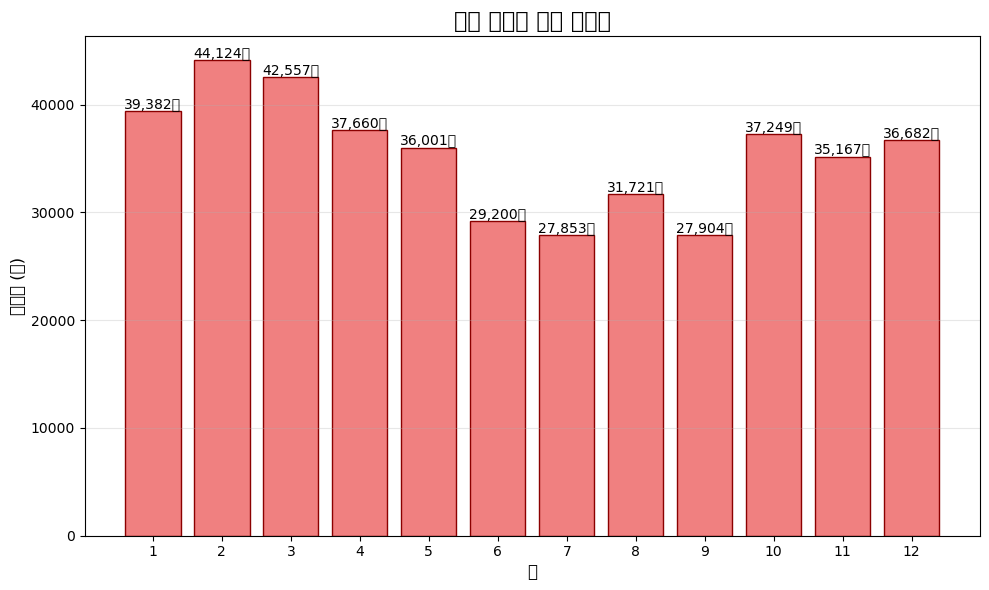

In [20]:
# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(month_average.index, month_average.values, color='lightcoral', edgecolor='darkred')

# 막대 위에 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}원',
             ha='center', va='bottom', fontsize=10)

plt.title('월별 고등어 평균 경매가', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('평균가 (원)', fontsize=12)
plt.xticks(range(1, 13))  # 1월부터 12월까지 표시
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
data_all.head()

,date,year,month,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가
0,2021-01-01,2021,1,(냉)고등어,기타(국내),20미,CT/(BT),20,10.0,50000.0,45000.0,49800.0
1,2021-01-01,2021,1,(냉)고등어,기타(국내),30미,CT/(BT),50,10.0,32000.0,32000.0,32000.0
2,2021-01-01,2021,1,(냉)염고등어,기타(국내),소,CT/(BT),30,9.0,26500.0,26500.0,26500.0
3,2021-01-01,2021,1,(냉)고등어,노르웨이,400/600,CT/(BT),833,20.0,77000.0,54100.0,55900.0
4,2021-01-01,2021,1,(냉)고등어,노르웨이,300/500,CT/(BT),260,20.0,63700.0,58500.0,59700.0


In [23]:
# 전체데이터에서 고등어 종류가 몇가지 인지 확인
godeungeo_types = data_all[data_all['어종'].str.contains('고등어', na=False)]['어종'].unique()

print("고등어 종류:")
print(godeungeo_types)
print(f"\n총 {len(godeungeo_types)}가지")

고등어 종류:
['(냉)고등어' '(냉)염고등어' '(선)고등어' '(선)점고등어' '(활)고등어' '(냉)망치고등어' '(선)염고등어'
 '(냉)점고등어']

총 8가지


In [24]:
# 연도별 , 월별 전체 거래량의 합계
volume_summary = data_all.groupby(['year', 'month'])['중량'].sum().reset_index()
volume_summary.columns = ['연도', '월', '총중량']

print(volume_summary)

      연도   월    총중량
0   2021   1  502.0
1   2021   2  489.5
2   2021   3  701.5
3   2021   4  636.0
4   2021   5  350.5
5   2021   6  556.0
6   2021   7  824.0
7   2021   8  741.5
8   2021   9  347.5
9   2021  10  371.4
10  2021  11  406.5
11  2021  12  399.5
12  2022   1  331.5
13  2022   2  549.0
14  2022   3  315.5
15  2022   4  465.0
16  2022   5  438.5
17  2022   6  530.5
18  2022   7  457.5
19  2022   8  496.5
20  2022   9  661.8
21  2022  10  448.5
22  2022  11  887.3
23  2022  12  560.8
24  2023   1  589.5
25  2023   2  704.5
26  2023   3  774.0
27  2023   4  478.0
28  2023   5  449.5
29  2023   6  447.0
30  2023   7  769.0
31  2023   8  532.0
32  2023   9  512.0
33  2023  10  633.5
34  2023  11  676.5
35  2023  12  436.0
36  2024   1  339.5
37  2024   2  326.5
38  2024   3  413.5
39  2024   4  278.0
40  2024   5  367.5
41  2024   6  343.0
42  2024   7  387.5
43  2024   8  380.5
44  2024   9  324.0
45  2024  10  350.0
46  2024  11  443.0
47  2024  12  518.5


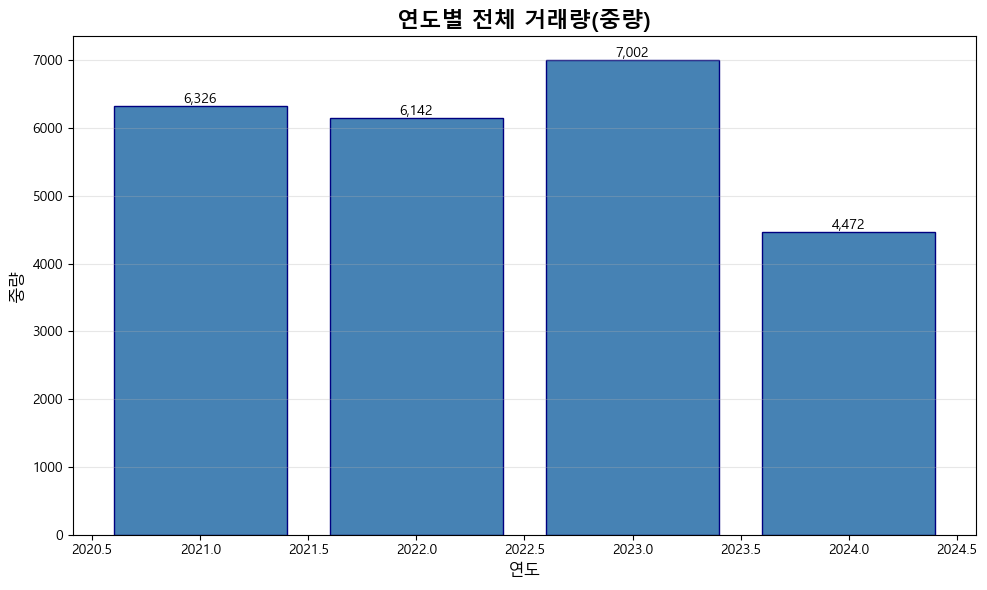

In [25]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 연도별 총 중량
yearly_volume = data_all.groupby('year')['중량'].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_volume.index, yearly_volume.values, color='steelblue', edgecolor='navy')

# 값 표시
for i, (year, value) in enumerate(yearly_volume.items()):
    plt.text(year, value, f'{value:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.title('연도별 전체 거래량(중량)', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('중량', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

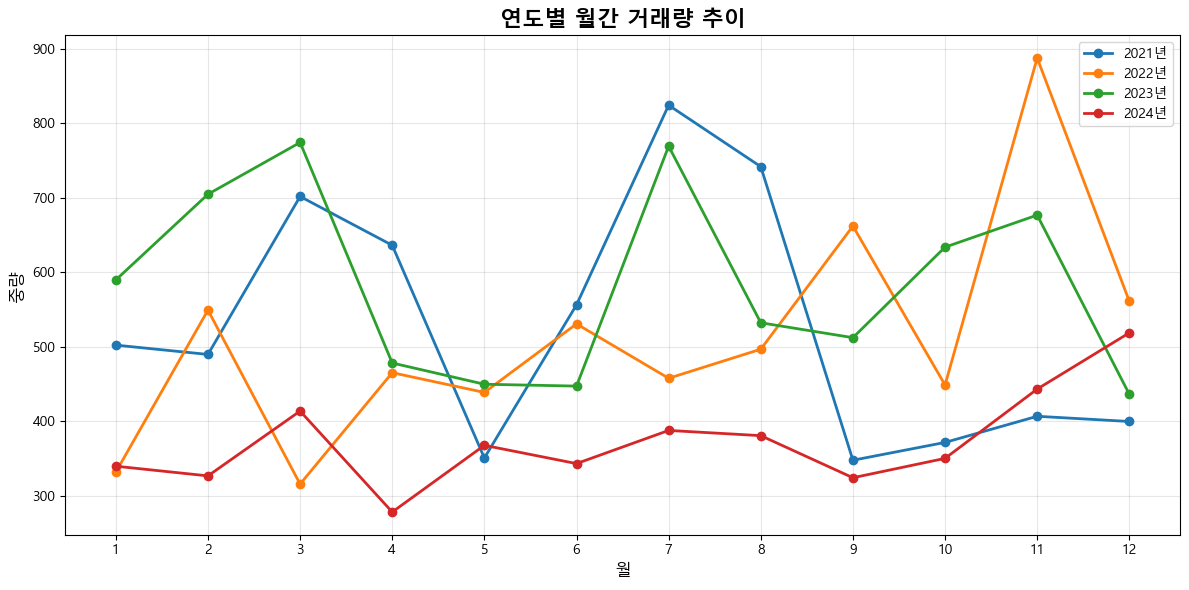

In [26]:
# 월별 평균 중량 (연도별 구분)
monthly_volume = data_all.groupby(['year', 'month'])['중량'].sum().reset_index()

plt.figure(figsize=(12, 6))
for year in monthly_volume['year'].unique():
    year_data = monthly_volume[monthly_volume['year'] == year]
    plt.plot(year_data['month'], year_data['중량'], 
             marker='o', label=f'{year}년', linewidth=2)

plt.title('연도별 월간 거래량 추이', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('중량', fontsize=12)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
# 어종별 평균 경매가
species_avg = data_all.groupby('어종')['평균가'].mean().sort_values(ascending=False)
# TOP 5
top5_species = species_avg.head(5)

print("가장 비싼 어종 TOP 5:")
print(top5_species)

가장 비싼 어종 TOP 5:
어종
(냉)고등어     45942.961165
(냉)염고등어    36290.719258
(선)염고등어    34242.857143
(선)점고등어    34240.000000
(선)고등어     31446.768707
Name: 평균가, dtype: float64


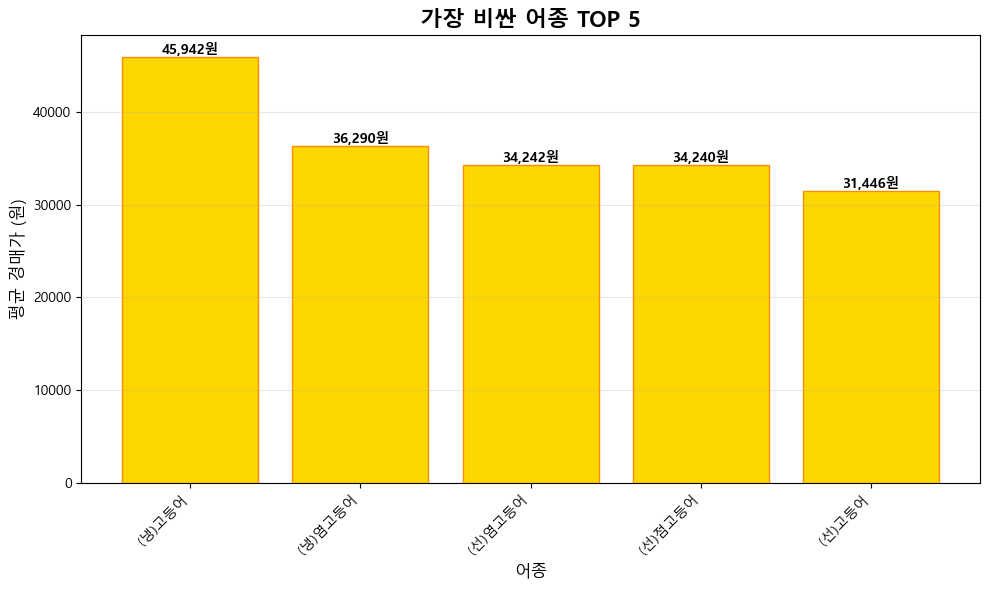

In [28]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# TOP 5 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(range(5), top5_species.values, color='gold', edgecolor='darkorange')

# 값 표시
for i, (species, value) in enumerate(top5_species.items()):
    plt.text(i, value, f'{int(value):,}원', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('가장 비싼 어종 TOP 5', fontsize=16, fontweight='bold')
plt.xlabel('어종', fontsize=12)
plt.ylabel('평균 경매가 (원)', fontsize=12)
plt.xticks(range(5), top5_species.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
# 기타(국내) 산지 + 고등어 필터링
gita_godeungeo = data_all[
    (data_all['산지'] == '기타(국내)') & 
    (data_all['어종'].str.contains('고등어', na=False))
]

# 월별 평균가
monthly_avg_gita = gita_godeungeo.groupby('month')['평균가'].mean()

print("기타(국내) 산지 고등어 월별 평균가:")
print(monthly_avg_gita)

기타(국내) 산지 고등어 월별 평균가:
month
1     40208.000000
2     43168.750000
3     44895.000000
4     38507.692308
5     39414.285714
6     32020.000000
7     35907.692308
8     26947.826087
9     32360.000000
10    37569.696970
11    36409.523810
12    35885.714286
Name: 평균가, dtype: float64


In [30]:
# 월별 통계 (평균가, 거래건수, 총중량)
monthly_stats_gita = gita_godeungeo.groupby('month').agg({
    '평균가': 'mean',
    '어종': 'count',
    '중량': 'sum'
}).round(2)

monthly_stats_gita.columns = ['평균가', '거래건수', '총중량']

print(monthly_stats_gita)

            평균가  거래건수    총중량
month                       
1      40208.00    25  291.0
2      43168.75    32  376.0
3      44895.00    20  232.0
4      38507.69    26  332.5
5      39414.29    28  304.5
6      32020.00    20  246.5
7      35907.69    13  143.0
8      26947.83    23  246.0
9      32360.00    20  217.0
10     37569.70    33  414.9
11     36409.52    42  504.0
12     35885.71    21  266.0


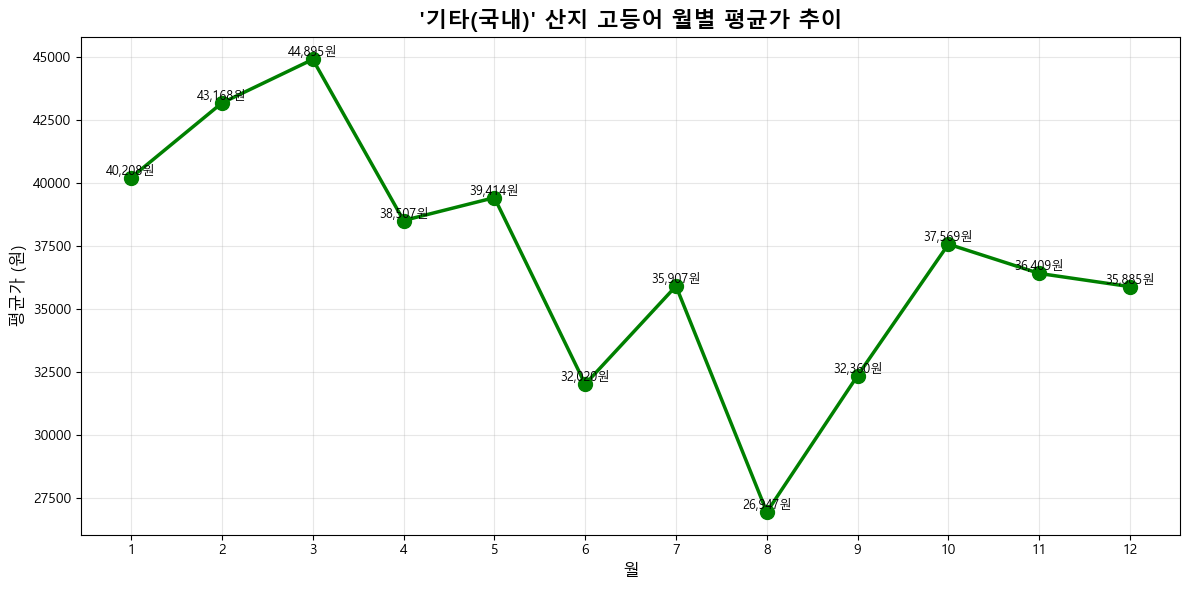

In [31]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_gita.index, monthly_avg_gita.values, 
         marker='o', linewidth=2.5, markersize=10, color='green')

# 값 표시
for month, value in monthly_avg_gita.items():
    plt.text(month, value, f'{int(value):,}원', 
             ha='center', va='bottom', fontsize=9)

plt.title("'기타(국내)' 산지 고등어 월별 평균가 추이", fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('평균가 (원)', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# 포장 형태(S/P, CT/BT, kg 등)별 평균 경매가를 비교
package_avg = data_all.groupby('포장')['평균가'].mean().sort_values(ascending=False)

print("포장 형태별 평균 경매가:")
print(package_avg)

포장 형태별 평균 경매가:
포장
box        70200.000000
CT/(BT)    42208.267717
S/P        31395.273024
PAN(펜)     27500.000000
c/s(상자)    25866.666667
kg         23722.000000
Name: 평균가, dtype: float64


In [33]:
# 포장 형태별 통계 (평균가, 거래건수, 총중량)
package_stats = data_all.groupby('포장').agg({
    '평균가': 'mean',
    '어종': 'count',
    '중량': 'sum',
    '낙찰고가': 'max',
    '낙찰저가': 'min'
}).round(2)

package_stats.columns = ['평균가', '거래건수', '총중량', '최고가', '최저가']
package_stats = package_stats.sort_values('평균가', ascending=False)

print("포장 형태별 상세 통계:")
print(package_stats)

포장 형태별 상세 통계:
              평균가  거래건수      총중량       최고가      최저가
포장                                                 
box      70200.00     6     80.0  120000.0  20700.0
CT/(BT)  42208.27   762   8568.5  110000.0   8000.0
S/P      31395.27  1227  14933.0  160000.0   1000.0
PAN(펜)   27500.00     1     12.0   27500.0  27500.0
c/s(상자)  25866.67     6     85.0   73000.0  10000.0
kg       23722.00    50    262.8  120000.0    100.0


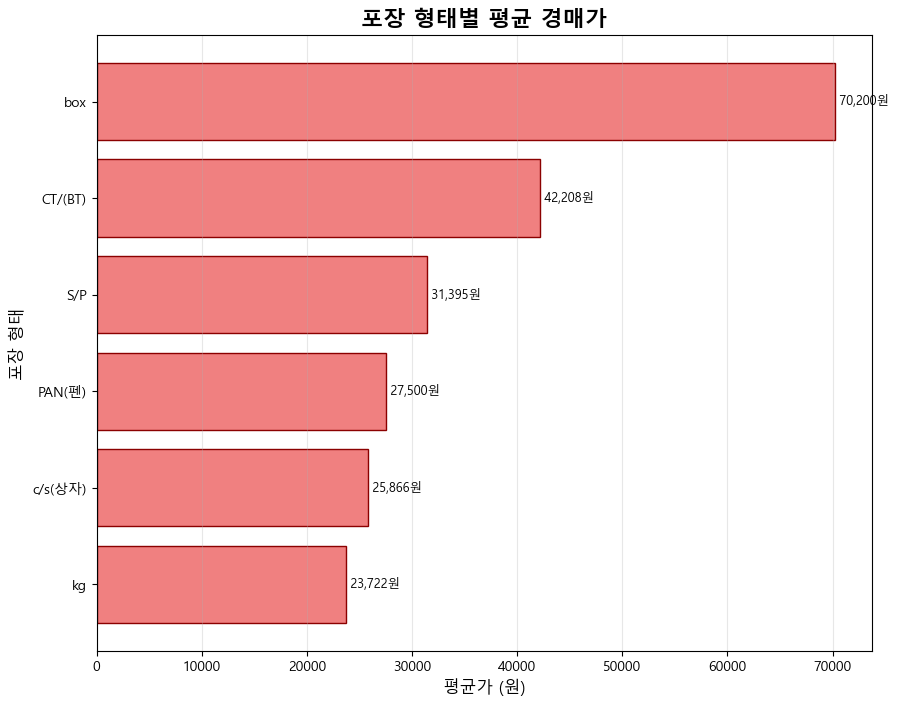

<Figure size 800x500 with 0 Axes>

In [34]:
# 수평 막대 그래프
plt.figure(figsize=(10, 8))
plt.barh(range(len(package_avg)), package_avg.values[::-1], 
         color='lightcoral', edgecolor='darkred')

# 값 표시
for i, value in enumerate(package_avg.values[::-1]):
    plt.text(value, i, f' {int(value):,}원', 
             va='center', fontsize=9)

plt.title('포장 형태별 평균 경매가', fontsize=16, fontweight='bold')
plt.xlabel('평균가 (원)', fontsize=12)
plt.ylabel('포장 형태', fontsize=12)
plt.yticks(range(len(package_avg)), package_avg.index[::-1])
plt.grid(axis='x', alpha=0.3)
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.show()

In [35]:
# 각 월별로 가장 거래가 많이 일어난 산지
# 월별, 산지별 거래건수
monthly_region = data_all.groupby(['month', '산지']).size().reset_index(name='거래건수')

# 각 월별로 가장 거래가 많은 산지
top_region_by_month = monthly_region.loc[monthly_region.groupby('month')['거래건수'].idxmax()]

print("월별 가장 거래가 많은 산지:")
print(top_region_by_month)

월별 가장 거래가 많은 산지:
     month      산지  거래건수
11       1     제주도    41
21       2     제주도    67
30       3     제주도    53
42       4     제주도    41
54       5     제주도    40
64       6    노르웨이    30
92       7     제주도    49
99       8    노르웨이    37
111      9    노르웨이    29
123     10  기타(국내)    33
144     11  기타(국내)    42
169     12     제주도    36


In [36]:
# 각 월별 상위 3개 산지
top3_by_month = monthly_region.sort_values(['month', '거래건수'], ascending=[True, False])
top3_by_month = top3_by_month.groupby('month').head(3)

print("월별 거래 상위 3개 산지:")
for month in range(1, 13):
    month_data = top3_by_month[top3_by_month['month'] == month]
    print(f"\n{month}월:")
    for idx, row in month_data.iterrows():
        print(f"  {row['산지']}: {row['거래건수']}건")

월별 거래 상위 3개 산지:

1월:
  제주도: 41건
  부산(기장): 31건
  노르웨이: 29건

2월:
  제주도: 67건
  부산(기장): 35건
  기타(국내): 32건

3월:
  제주도: 53건
  부산(기장): 46건
  노르웨이: 34건

4월:
  제주도: 41건
  부산(기장): 37건
  노르웨이: 27건

5월:
  제주도: 40건
  노르웨이: 33건
  기타(국내): 28건

6월:
  노르웨이: 30건
  제주도: 28건
  속초: 21건

7월:
  제주도: 49건
  노르웨이: 36건
  부산(기장): 27건

8월:
  노르웨이: 37건
  부산(기장): 34건
  제주도: 25건

9월:
  노르웨이: 29건
  부산(기장): 23건
  안흥: 22건

10월:
  기타(국내): 33건
  부산(기장): 30건
  노르웨이: 29건

11월:
  기타(국내): 42건
  부산(기장): 37건
  노르웨이: 36건

12월:
  제주도: 36건
  부산(기장): 32건
  노르웨이: 31건
